## Exploratory Data Analysis 

Now that I have validated all columns of our data and made it ready for analysis, I will do some preliminary exploratory data analysis before building our models. 

Our main objectives with exploratory data analysis is to get a better sense of the data we are working with, and to see if we can find any correlation between recipe features and high traffic to the Tasty Bytes website. 

First, I will take a look at our categorical variables, 'Category' and 'Servings', to see what the most common recipe category and number of servings per recipe are. 

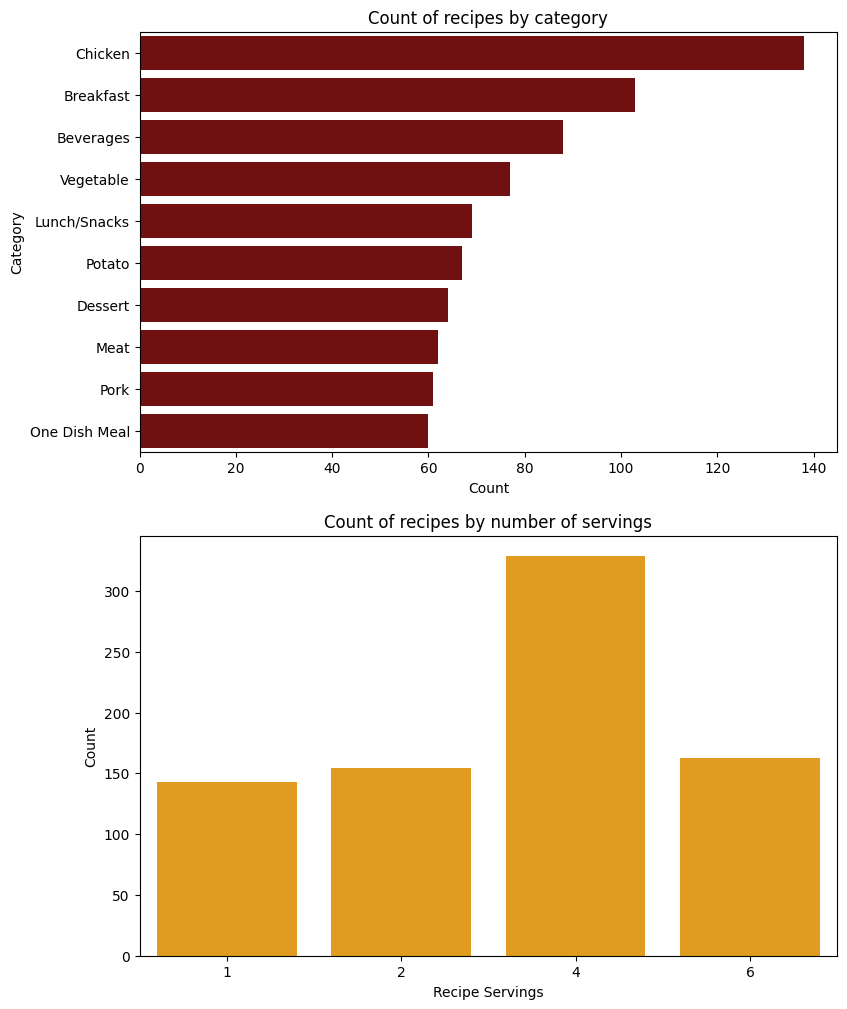

In [37]:
count_by_category = (
    recipes_cleaned.groupby('category')['category']
                   .count()
                   .reset_index(name='count')
                   .sort_values('count', ascending=False)
)

fig, axs = plt.subplots(2, 1, figsize=(9,12))
sns.barplot(data=count_by_category, y='category', x='count', ax=axs[0], color='maroon', orient='h')
axs[0].set_title('Count of recipes by category')
axs[0].set_ylabel('Category')
axs[0].set_xlabel('Count')

sns.countplot(data=recipes_cleaned, x="servings", ax=axs[1], color='orange', order=['1', '2', '4', '6'])
axs[1].set_title('Count of recipes by number of servings')
axs[1].set_ylabel('Count')
axs[1].set_xlabel('Recipe Servings')
plt.subplots_adjust(hspace=0.2)
plt.show()


It looks like chicken is the most popular recipe category, and the most common number of servings a recipe makes is 4.

Next, I will take a look at the high_traffic column. What percent of all recipes led to high website traffic? How does this change based on the recipe category and number of servings?

True     0.583016
False    0.416984
Name: high_traffic, dtype: float64

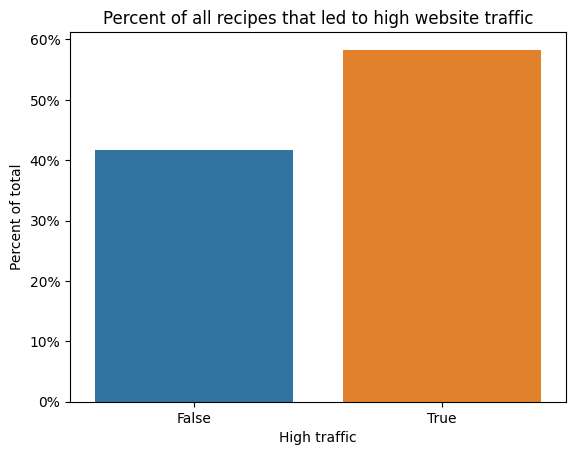

In [38]:
# Investigating what percent of all recipes led to high website traffic in our dataset
normalized_traffic = recipes_cleaned['high_traffic'].value_counts(normalize=True).sort_values(ascending=False)
display(normalized_traffic)
sns.barplot(x=normalized_traffic.index, y=normalized_traffic,  ci=None)
plt.ylabel("Percent of total")
plt.yticks(ticks=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], labels = ['0%', '10%', '20%', '30%', '40%', '50%', '60%'])
plt.xlabel('High traffic')
plt.title('Percent of all recipes that led to high website traffic')
plt.show()

It looks like approximately 58% of recipes in the dataset led to high traffic on the website when posted on the home page. 

How does this differ by category and number of servings?

,category,high_traffic,percentage
18,Vegetable,True,0.987013
16,Potato,True,0.925373
14,Pork,True,0.901639
12,One Dish Meal,True,0.733333
10,Meat,True,0.725806
6,Dessert,True,0.640625
8,Lunch/Snacks,True,0.623188
5,Chicken,True,0.420290
3,Breakfast,True,0.310680
1,Beverages,True,0.045455


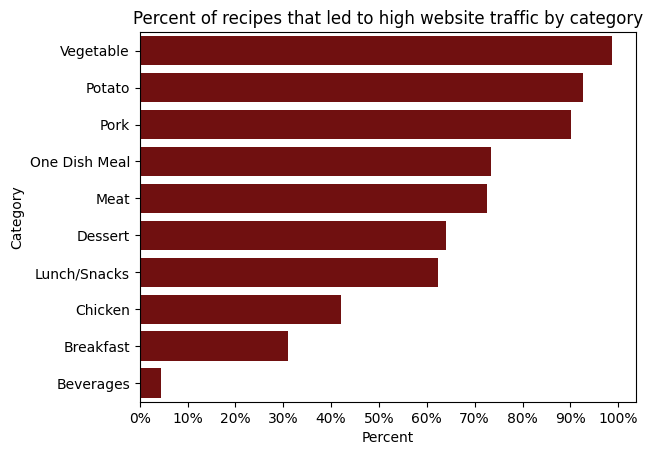

In [39]:
(normalized_traffic_by_category := 
     (recipes_cleaned
      .groupby('category')['high_traffic']
      .value_counts(normalize=True)
      .rename('percentage')
      .reset_index()
      .query('high_traffic')
      .sort_values('percentage', ascending=False)
     )
)
display(normalized_traffic_by_category)
sns.barplot(data=normalized_traffic_by_category, x='percentage', y='category', color='maroon', orient='h')
plt.ylabel('Category')
plt.xlabel('Percent')
plt.xticks(ticks=np.arange(0,1.1,0.1), labels = ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.title('Percent of recipes that led to high website traffic by category')
plt.show()

,category,high_traffic,percentage
18,Vegetable,True,0.987013
16,Potato,True,0.925373
14,Pork,True,0.901639
12,One Dish Meal,True,0.733333
10,Meat,True,0.725806
6,Dessert,True,0.640625
8,Lunch/Snacks,True,0.623188
5,Chicken,True,0.420290
3,Breakfast,True,0.310680
1,Beverages,True,0.045455


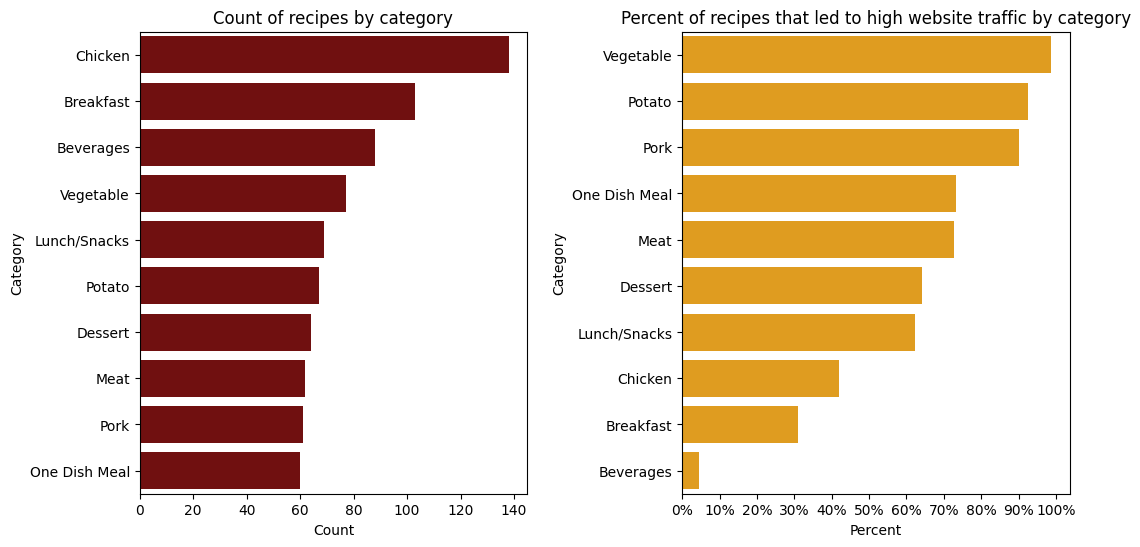

In [40]:
display(normalized_traffic_by_category)
fig, axs = plt.subplots(1, 2, figsize=(12,6))
sns.barplot(data=count_by_category, y='category', x='count', ax=axs[0], color='maroon', orient='h')
axs[0].set_title('Count of recipes by category')
axs[0].set_ylabel('Category')
axs[0].set_xlabel('Count')

sns.barplot(data=normalized_traffic_by_category, y='category', x='percentage', ax=axs[1], color='orange', orient='h')
axs[1].set_title('Percent of recipes that led to high website traffic by category')
axs[1].set_ylabel('Category')
axs[1].set_xlabel('Percent')
axs[1].set_xticks(ticks=np.arange(0,1.1,0.1), labels = ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])

fig.subplots_adjust(wspace=0.4)
plt.show()


According to the above, it looks like recipes in the Vegetable, Potato, and Pork categories are correlated with high traffic. A whopping 98.7% of recipes in the Vegetable category are marked as high-traffic recipes! On the other hand, recipes in the Chicken, Breakfast, and Beverages categories were the least correlated with high traffic. 

I will do the same thing with servings, and see if there is any correlation between the number of servings in a recipe and high website traffic.

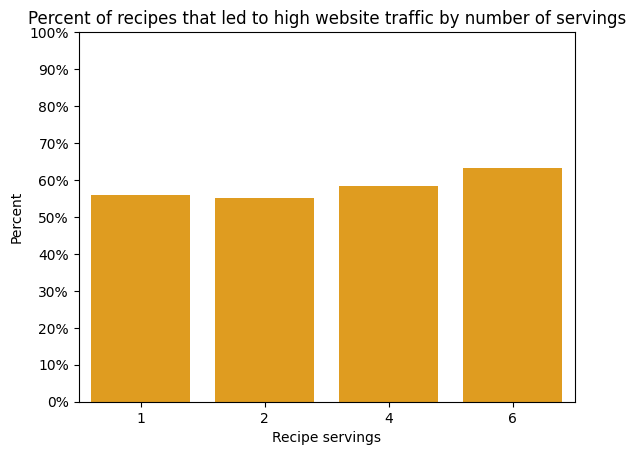

In [41]:
(normalized_traffic_by_servings := 
     (recipes_cleaned
      .groupby('servings')['high_traffic']
      .value_counts(normalize=True)
      .rename('percentage')
      .reset_index()
      .query('high_traffic')
      .sort_values('percentage', ascending=False)
     )
)
sns.barplot(data=normalized_traffic_by_servings, x='servings', y='percentage', color='orange', order=['1', '2', '4', '6'])
plt.ylabel("Percent")
plt.yticks(ticks=np.arange(0,1.1,0.1), labels = ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.xlabel('Recipe servings')
plt.title('Percent of recipes that led to high website traffic by number of servings')
plt.show()

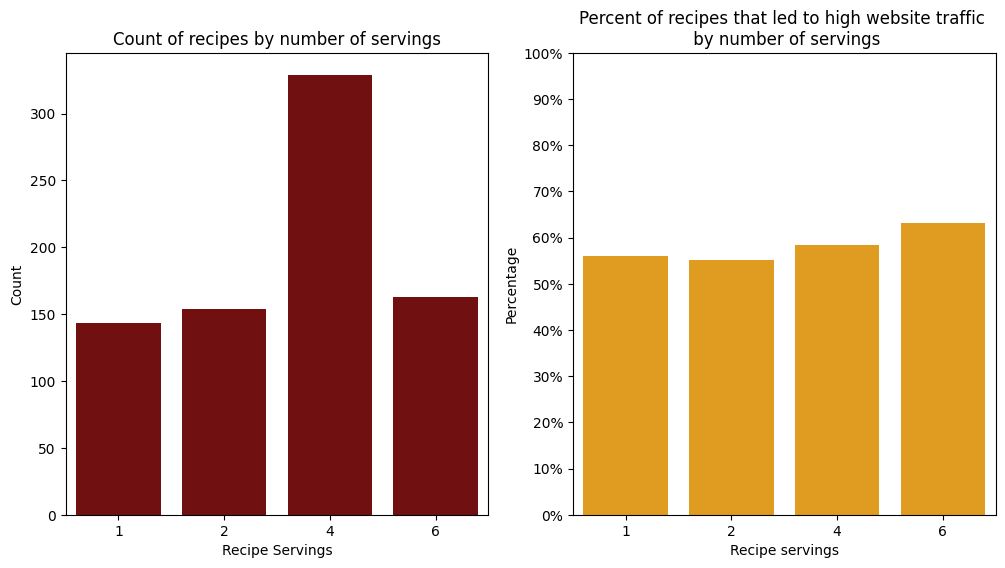

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))

sns.countplot(data=recipes_cleaned, x="servings", ax=axs[0], color='maroon', order=['1', '2', '4', '6'])
axs[0].set_title('Count of recipes by number of servings')
axs[0].set_ylabel('Count')
axs[0].set_xlabel('Recipe Servings')

sns.barplot(data=normalized_traffic_by_servings, x='servings', y='percentage', color='orange', ax=axs[1], order=['1', '2', '4', '6'])
axs[1].set_title('Percent of recipes that led to high website traffic \n by number of servings')
axs[1].set_ylabel("Percentage")
axs[1].set_yticks(ticks=np.arange(0,1.1,0.1), labels = ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
axs[1].set_xlabel('Recipe servings')

plt.subplots_adjust(hspace=0.2)
plt.show()

It looks like there might be a slight positive correlation between number of servings and high website traffic, but it appears quite minimal.

Let's visualize the numeric columns as well, to see if there is any correlation between calories, carbohydrates, sugar, and protein in a recipe, and high website traffic.

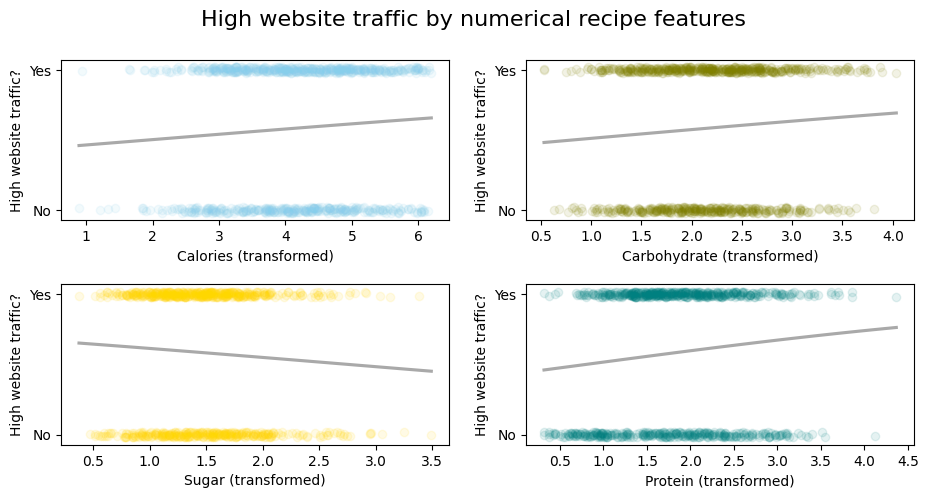

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(11,5))
sns.regplot(data=recipes_cleaned, x='qdrt_calories', y='high_traffic', line_kws={'color': 'darkgray'}, scatter_kws={'color': 'skyblue', 'alpha':0.1}, ax=axs[0, 0], ci=None, logistic=True, y_jitter=0.02)
sns.regplot(data=recipes_cleaned, x='qdrt_carbohydrate', y='high_traffic', line_kws={'color': 'darkgray'}, scatter_kws={'color': 'olive', 'alpha':0.1}, ax=axs[0, 1], ci=None, logistic=True, y_jitter=0.02)
sns.regplot(data=recipes_cleaned, x='qdrt_sugar', y='high_traffic', line_kws={'color': 'darkgray'}, scatter_kws={'color': 'gold', 'alpha':0.1}, ax=axs[1, 0], ci=None, logistic=True, y_jitter=0.02)
sns.regplot(data=recipes_cleaned, x='qdrt_protein', y='high_traffic', line_kws={'color': 'darkgray'}, scatter_kws={'color': 'teal', 'alpha':0.1}, ax=axs[1, 1], ci=None, logistic=True, y_jitter=0.02)
plt.suptitle('High website traffic by numerical recipe features', fontsize=16)
fig.subplots_adjust(hspace=0.4)
axs[0,0].set_yticks(ticks=[0,1], labels = ['No', 'Yes'])
axs[0,1].set_yticks(ticks=[0,1], labels = ['No', 'Yes'])
axs[1,0].set_yticks(ticks=[0,1], labels = ['No', 'Yes'])
axs[1,1].set_yticks(ticks=[0,1], labels = ['No', 'Yes'])
axs[0,0].set_xlabel('Calories (transformed)')
axs[0,1].set_xlabel('Carbohydrate (transformed)')
axs[1,0].set_xlabel('Sugar (transformed)')
axs[1,1].set_xlabel('Protein (transformed)')
axs[0,0].set_ylabel('High website traffic?')
axs[0,1].set_ylabel('High website traffic?')
axs[1,0].set_ylabel('High website traffic?')
axs[1,1].set_ylabel('High website traffic?')
plt.show()


Above we can see that there appears to be slight positive correlations between qdrt_calories and high_traffic, qdrt_carbohydrate and high_traffic, and qdrt_protein and high_traffic. There also appears to be a slight negative correlation between qdrt_sugar and high_traffic. This could suggest that recipes with more calories, more carbohydrates, and more protein tend to lead to high traffic, while recipes with more sugar do not tend to lead to high traffic.

Finally, I will take a look at whether the numerical metrics are correlated with each other using a heat map.

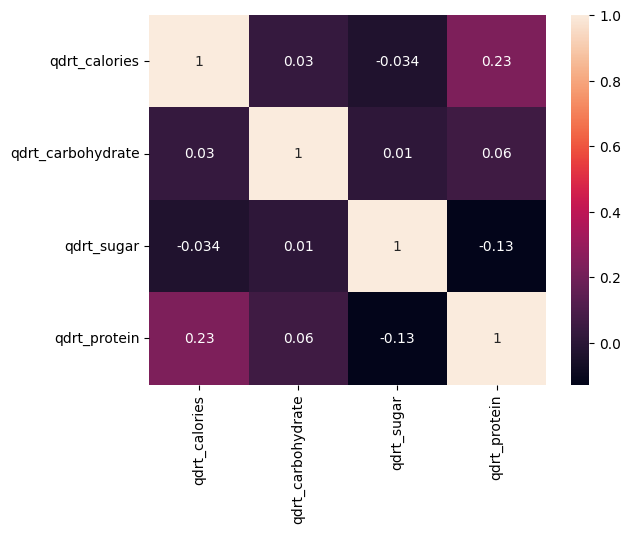

In [44]:
correlation_matrix = recipes_cleaned[['qdrt_calories', 'qdrt_carbohydrate', 'qdrt_sugar', 'qdrt_protein']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In the above heatmap, a correlation score of 1 means perfect correlation, and 0 means no correlation at all. It doesn't look like there are many strong correlations between the above variables. I find this quite interesting as we would probably expect the calorie count of a recipe to increase as its nutritional components, such as sugar, increase. The strongest correlation coefficient we see above is 0.23 between qdrt_protein and qdrt_calories. 